In [ ]:
#Importing libraries
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Importing datasets
train=pd.read_csv('train.csv')
print(train.head())
print(train.shape)
test=pd.read_csv('test.csv')
print(test.head())
print(test.shape)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

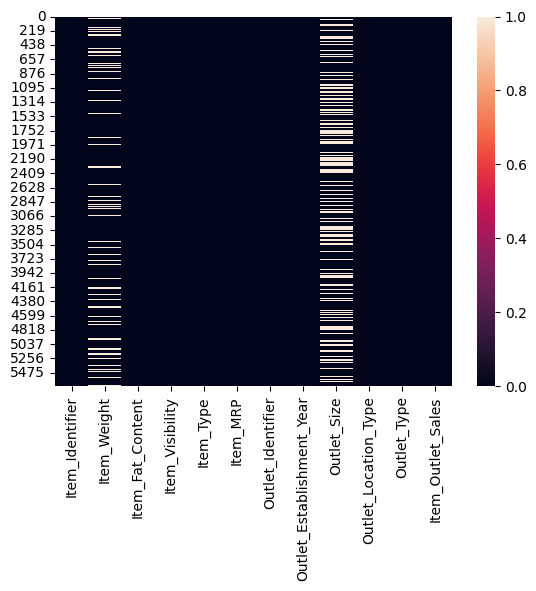

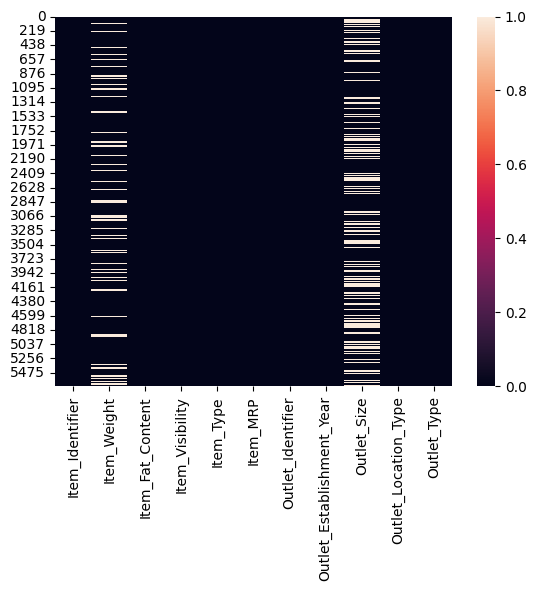

In [ ]:
#Creating heatmaps to check if the datasets are balanced or not
sns.heatmap(train.isnull())
plt.show()
sns.heatmap(test.isnull())
plt.show()

In [ ]:
#Handling null values in the training dataset
avgtrain=train['Item_Weight'].mean()
print(avgtrain)
train['Item_Weight'].fillna(avgtrain,inplace=True)
print(train)

12.947092655128746
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
3              FDX07    19.200000          Regular         0.000000   
4              NCD19     8.930000          Low Fat         0.000000   
...              ...          ...              ...              ...   
5677           FDD29    12.150000          Low Fat         0.018395   
5678           FDG58    10.695000          Regular         0.087272   
5679           FDV15    12.947093          Low Fat         0.145465   
5680           FDV04     7.825000          Regular         0.149890   
5681           DRJ23    18.350000          Low Fat         0.041634   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1         

In [ ]:
#Filling column with null values in the training dataset
train.fillna('High',inplace=True)
print(train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
3              FDX07    19.200000          Regular         0.000000   
4              NCD19     8.930000          Low Fat         0.000000   
...              ...          ...              ...              ...   
5677           FDD29    12.150000          Low Fat         0.018395   
5678           FDG58    10.695000          Regular         0.087272   
5679           FDV15    12.947093          Low Fat         0.145465   
5680           FDV04     7.825000          Regular         0.149890   
5681           DRJ23    18.350000          Low Fat         0.041634   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [ ]:
#Handling null values in the testing dataset
avgtest=test['Item_Weight'].mean()
print(avgtest)
test['Item_Weight'].fillna(avgtest,inplace=True)
print(test)

12.695633368756642
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58    20.750000          Low Fat         0.007565   
1              FDW14     8.300000              reg         0.038428   
2              NCN55    14.600000          Low Fat         0.099575   
3              FDQ58     7.315000          Low Fat         0.015388   
4              FDY38    12.695633          Regular         0.118599   
...              ...          ...              ...              ...   
5677           FDB58    10.500000          Regular         0.013496   
5678           FDD47     7.600000          Regular         0.142991   
5679           NCO17    10.000000          Low Fat         0.073529   
5680           FDJ26    15.300000          Regular         0.000000   
5681           FDU37     9.500000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1               

In [ ]:
#Filling column with null values in the testing dataset
test.fillna('High',inplace=True)
print(test)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58    20.750000          Low Fat         0.007565   
1              FDW14     8.300000              reg         0.038428   
2              NCN55    14.600000          Low Fat         0.099575   
3              FDQ58     7.315000          Low Fat         0.015388   
4              FDY38    12.695633          Regular         0.118599   
...              ...          ...              ...              ...   
5677           FDB58    10.500000          Regular         0.013496   
5678           FDD47     7.600000          Regular         0.142991   
5679           NCO17    10.000000          Low Fat         0.073529   
5680           FDJ26    15.300000          Regular         0.000000   
5681           FDU37     9.500000          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

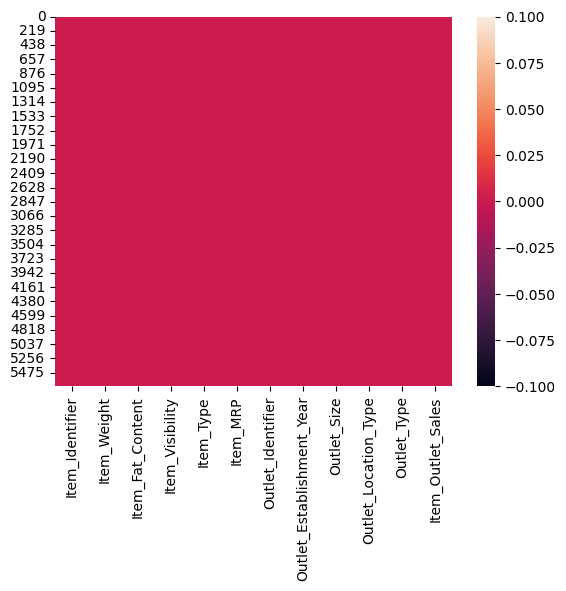

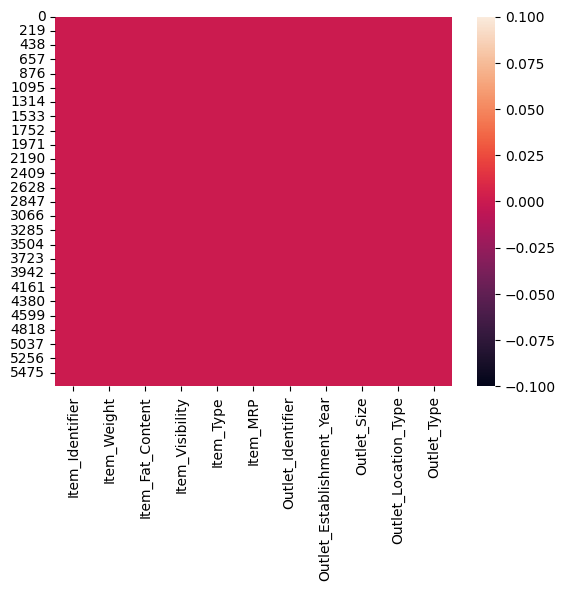

In [ ]:
#Creating heatmaps after handling the null values in the datasets
sns.heatmap(train.isnull())
plt.show()
sns.heatmap(test.isnull())
plt.show()

In [ ]:
#Providing integer locations
p=train.iloc[:,:-1].values
x=train.iloc[:,1].values
print(p)
print(x)
q=test.iloc[:,:-1].values
y=test.iloc[:,1].values
print(q)
print(y)

[['FDA15' 9.3 'Low Fat' ... 'Medium' 'Tier 1' 'Supermarket Type1']
 ['DRC01' 5.92 'Regular' ... 'Medium' 'Tier 3' 'Supermarket Type2']
 ['FDN15' 17.5 'Low Fat' ... 'Medium' 'Tier 1' 'Supermarket Type1']
 ...
 ['FDV15' 12.947092655128746 'Low Fat' ... 'Medium' 'Tier 3'
  'Supermarket Type3']
 ['FDV04' 7.825 'Regular' ... 'High' 'Tier 3' 'Supermarket Type1']
 ['DRJ23' 18.35 'Low Fat' ... 'High' 'Tier 3' 'Supermarket Type1']]
[ 9.3         5.92       17.5        ... 12.94709266  7.825
 18.35      ]
[['FDW58' 20.75 'Low Fat' ... 1999 'Medium' 'Tier 1']
 ['FDW14' 8.3 'reg' ... 2007 'High' 'Tier 2']
 ['NCN55' 14.6 'Low Fat' ... 1998 'High' 'Tier 3']
 ...
 ['NCO17' 10.0 'Low Fat' ... 2002 'High' 'Tier 2']
 ['FDJ26' 15.3 'Regular' ... 2007 'High' 'Tier 2']
 ['FDU37' 9.5 'Regular' ... 2002 'High' 'Tier 2']]
[20.75  8.3  14.6  ... 10.   15.3   9.5 ]


In [ ]:
p=p.reshape((11,-1))
print(p)
x=x.reshape((2841,2))
print(x)
q=q.reshape((20,2841))
print(q)
y=y.reshape((2841,2))
print(y)

[['FDA15' 9.3 'Low Fat' ... 0.00599072 'Household' 163.6526]
 ['OUT045' 2002 'High' ... 'Tier 1' 'Supermarket Type1' 'FDE50']
 [12.947092655128746 'Regular' 0.01612717 ... 'Dairy' 94.9436 'OUT049']
 ...
 ['Household' 159.4604 'OUT013' ... 2007 'High' 'Tier 2']
 ['Supermarket Type1' 'FDK50' 7.96 ... 'Regular' 0.0 'Starchy Foods']
 [173.6738 'OUT049' 1999 ... 'High' 'Tier 3' 'Supermarket Type1']]
[[ 9.3         5.92      ]
 [17.5        19.2       ]
 [ 8.93       10.395     ]
 ...
 [15.1        12.15      ]
 [10.695      12.94709266]
 [ 7.825      18.35      ]]
[['FDW58' 20.75 'Low Fat' ... 'High' 'Tier 2' 'FDG14']
 [9.0 'Regular' 0.050579228 ... 'Tier 3' 'NCP06' 20.7]
 ['Low Fat' 0.039325397 'Household' ... 'FDX13' 7.725 'Low Fat']
 ...
 [2004 'Small' 'Tier 2' ... 180.3002 'OUT019' 1985]
 ['Small' 'Tier 1' 'FDB14' ... 'OUT045' 2002 'High']
 ['Tier 2' 'DRG03' 14.5 ... 2002 'High' 'Tier 2']]
[[20.75        8.3       ]
 [14.6         7.315     ]
 [12.69563337 12.69563337]
 ...
 [13.       

In [ ]:
m=LinearRegression()
m.fit(x,y)
pre=m.predict([[2.5,2.5]])
print(pre)

[[12.93860597 12.76628396]]


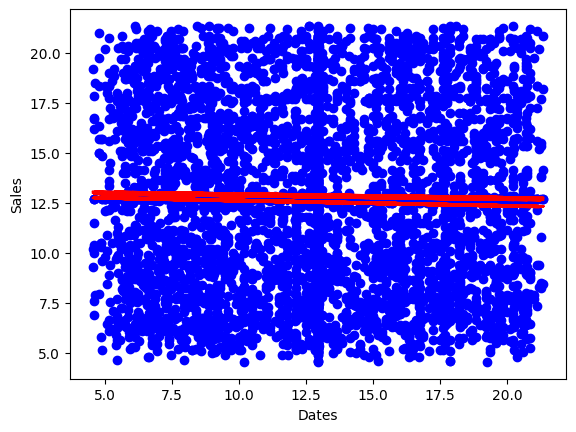

In [ ]:
plt.scatter(x,y,color="blue",label="Predicted")
plt.plot(x,m.predict(x),color="red",label="Actual")
plt.xlabel("Dates")
plt.ylabel("Sales")
plt.show()